In [1]:
# Perform imports and load the dataset:
import pandas as pd
df = pd.read_csv("smsspamcollection.csv",encoding="ISO-8859-1")
df.shape
df.head()
df.info()
# Checking for null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


v1    0
v2    0
dtype: int64

In [3]:
# Checking Duplicate values
df.duplicated().sum()

# Drop Duplicate values
df = df.drop_duplicates()
df.shape

# Renaming the columns
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.describe()

df.groupby('label').describe()


message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [7]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})
df.head()

df['message_len'] = df.message.apply(len)
df.head()


,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

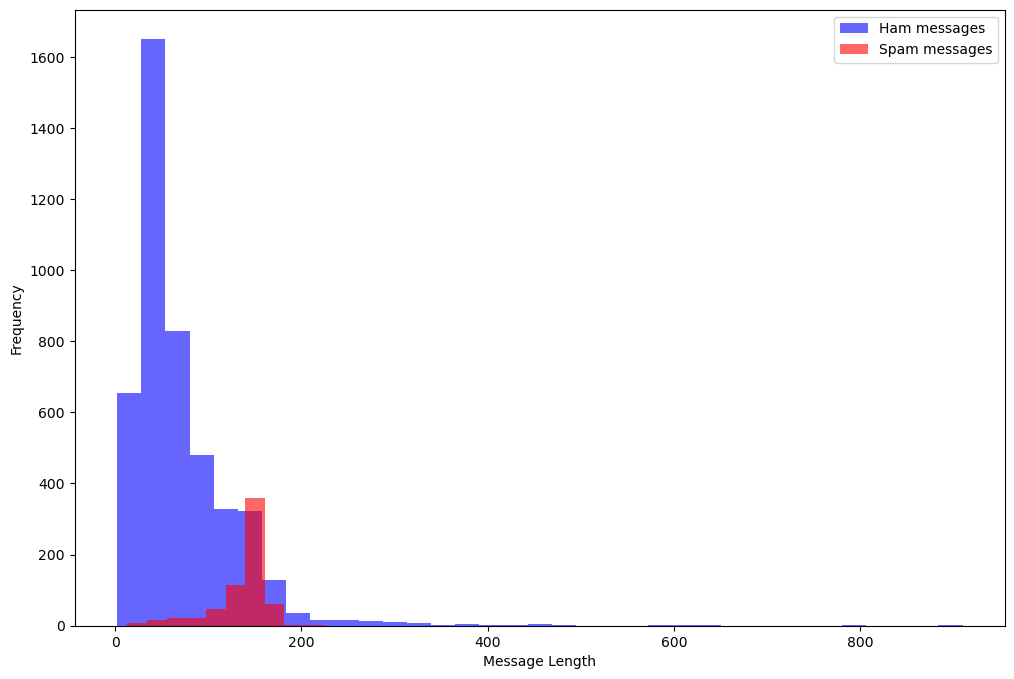

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

df[df.label == 'ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)
df[df.label == 'spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")


In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

stemmer = nltk.SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+\s*\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['message_clean'] = df['message'].apply(preprocess)
df.head(20)

print(df['message_clean'][304])


sms ac blind date    aberdeen unit kingdom check   blind date send hide


In [13]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


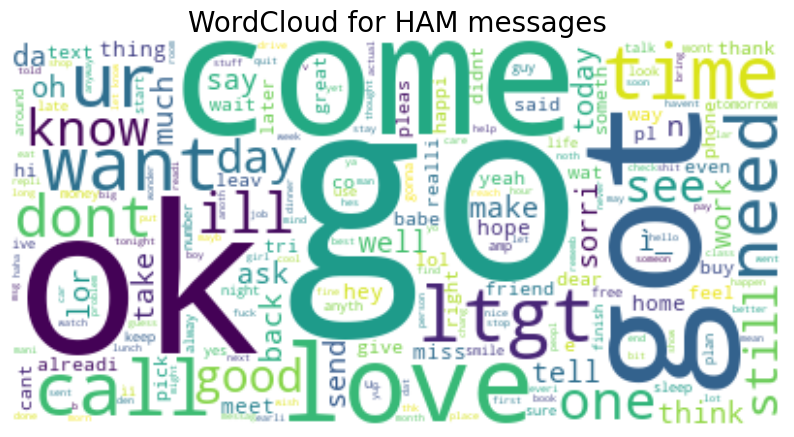

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',
    contour_width=2,
)

ham_text = ' '.join(text for text in df.loc[df['label'] == 'ham', 'message_clean'])
wc.generate(ham_text)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for HAM messages', fontsize=20)
plt.axis('off')
plt.show()


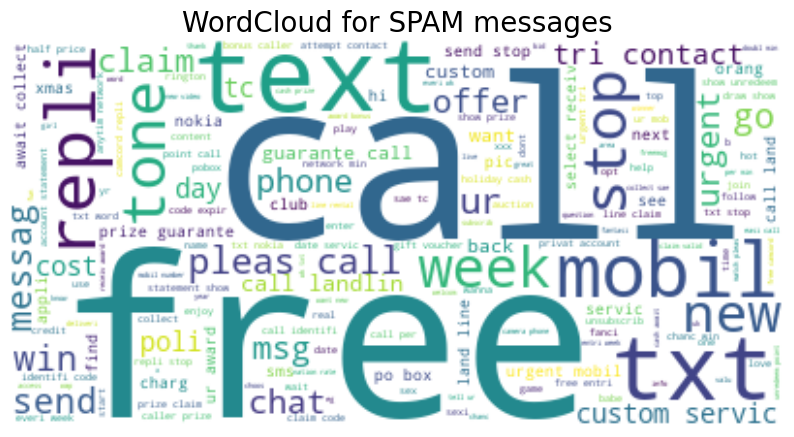

In [17]:
wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',
    contour_width=2,
)

ham_text = ' '.join(text for text in df.loc[df['label'] == 'spam', 'message_clean'])
wc.generate(ham_text)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for SPAM messages', fontsize=20)
plt.axis('off')
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(df['message_clean'])
y = df['label']


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)

# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)

# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)


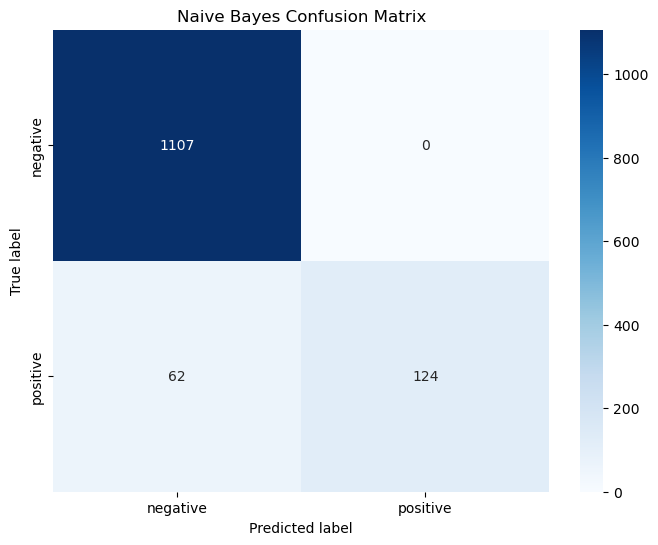

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1107
        spam       1.00      0.67      0.80       186

    accuracy                           0.95      1293
   macro avg       0.97      0.83      0.89      1293
weighted avg       0.95      0.95      0.95      1293


Naive Bayes Error Rate: 0.05


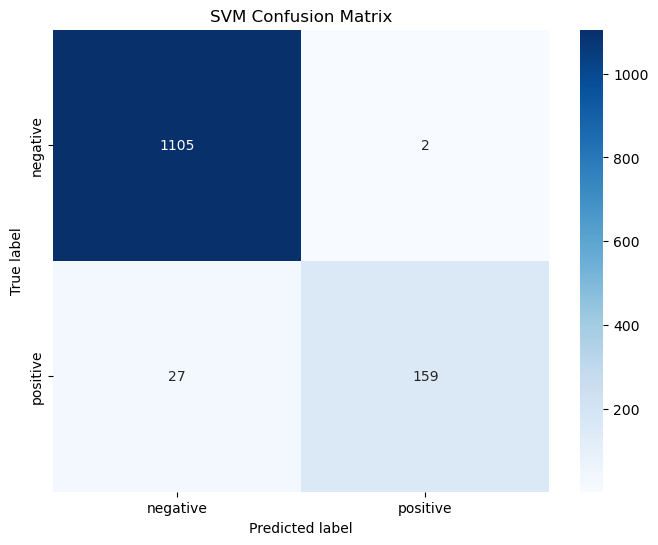


SVM Classifier Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.99      0.85      0.92       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293


SVM Error Rate: 0.02


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Naive Bayes Confusion Matrix
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# SVM Confusion Matrix
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")
